# Поиск топ мемов для RU

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
meme = pd.read_csv('tgbot_meme.csv', index_col = 0)

In [20]:
meme.head()

,meme_type,original_post_link,source_name,published_at,telegram_file_id,content_url,caption,content_lang,is_available,likes,dislikes,created_at,updated_at,is_broken,source_id,content_text,caption_lang,language_id
meme_id,,,,,,,,,,,,,,,,,,
13395,photo,https://vk.com/saintbeobanka?w=wall-67185996_2...,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,AgACAgQAAx0EVqG9GwACyDJefsuwVgIydYSqXSt9L2-o3Y...,https://sun6-14.userapi.com/c7004/v7004381/823...,NaN,ru,True,28,38,2020-03-28 03:59:44.496141+00,2021-02-10 07:21:58.272992+00,False,10.0,Будильник Отложить на 10 мимут vk.com/jaimes_h...,ww,2.0
13952,photo,https://reddit.com/r/wholesomememes/comments/f...,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,AgACAgQAAx0EVqG9GwAC0QZef4L5HUrdey1K4xOBNC0V0-...,https://i.redd.it/xo8ilxurnep41.png,Wholesome slavery?,en,True,9,16,2020-03-28 17:01:45.289559+00,2021-02-10 07:21:58.276687+00,False,80.0,Happy Thanksgiving ! I was gonna say Let's say...,en,3.0
15593,photo,https://t.me/LaQeque/41396,https://t.me/LaQeque,2020-03-30 09:11:04+00,AgACAgIAAx0CVqG9GwAC7X5egk_f1FcUOOXdwvQ6tCUBOP...,https://storage.googleapis.com/meme_imgs/15593...,NaN,ru,True,41,54,2020-03-30 12:02:40.780487+00,2021-02-10 07:21:58.28043+00,False,19.0,"Ггграждане, мемння ззовут вваш преззидент, ппо...",ww,2.0
18442,photo,https://reddit.com/r/dankmemes/comments/ftalgn...,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,AgACAgQAAx0EVqG9GwABAQ8_XoVyYdS-2R9bcIpdH4YqK-...,https://i.redd.it/a3mp5spddaq41.jpg,You Won’t last 10 seconds,en,True,87,48,2020-04-02 05:04:33.300689+00,2021-02-10 07:21:58.28401+00,False,78.0,AL ALL WT Should we contact the hot milfs in o...,en,3.0
20798,photo,https://vk.com/wtf.rasha?w=wall-23486067_179559,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,AgACAgQAAx0EVqG9GwABATuvXonKXWZuSeRqN8vd8gVR09...,https://sun9-37.userapi.com/c858228/v858228646...,NaN,ru,True,234,178,2020-04-04 12:10:28.173755+00,2021-02-10 07:21:58.291519+00,False,9.0,Шляпа Патриарха Никона @NikonaShapka апрель 20...,ww,2.0


Оставляем только интересующие нас колонки

In [3]:
cols = ['likes', 'dislikes', 'meme_type']
df = meme.loc[meme['content_lang']=='ru'][cols]
df.head()

,likes,dislikes,meme_type
meme_id,,,
13395,28,38,photo
15593,41,54,photo
20798,234,178,photo
73089,5,25,photo
46596,7,18,photo


Разбиваем тип мема в вектор

In [4]:
df = df.join(pd.get_dummies(df['meme_type']))
df.drop('meme_type', axis=1, inplace=True)
df.head()

,likes,dislikes,photo,video
meme_id,,,,
13395,28,38,1,0
15593,41,54,1,0
20798,234,178,1,0
73089,5,25,1,0
46596,7,18,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25724 entries, 13395 to 61616
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   likes     25724 non-null  int64
 1   dislikes  25724 non-null  int64
 2   photo     25724 non-null  uint8
 3   video     25724 non-null  uint8
dtypes: int64(2), uint8(2)
memory usage: 1.9 MB


Наша задача - откластеризовать все мемы. Методом локтя выберем количество кластеров

In [26]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

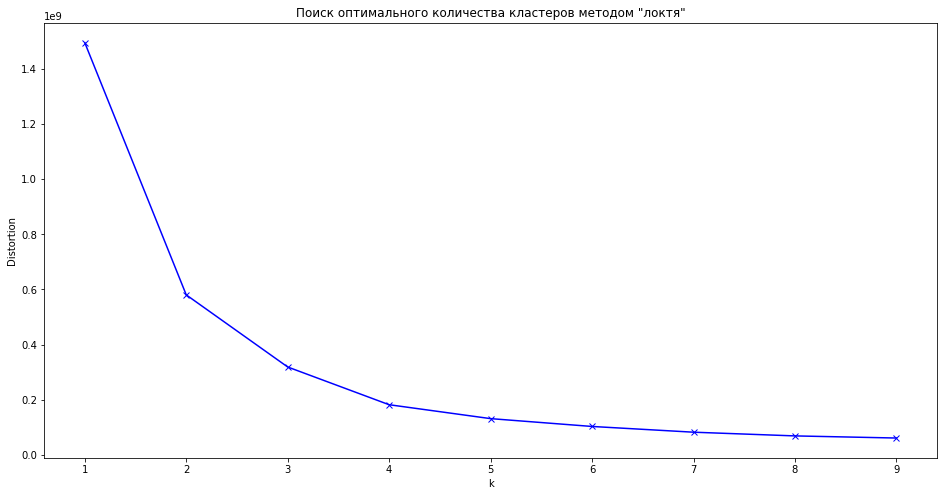

In [34]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Поиск оптимального количества кластеров методом "локтя"')
plt.show()

На трех кластерах наблюдаем перегиб в кривой - берем 3 кластера

In [8]:
k = 3
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(df)
pred = kmeanModel.predict(df)
df['label'] = pred
df.head()

,likes,dislikes,photo,video,label
meme_id,,,,,
13395,28,38,1,0,0
15593,41,54,1,0,0
20798,234,178,1,0,2
73089,5,25,1,0,0
46596,7,18,1,0,0


Посмотрим сумму всех значений по каждой фиче внутри кластеров

In [9]:
gr_df = df.groupby('label').sum()
gr_df

,likes,dislikes,photo,video
label,,,,
0,579171,812710,18151.0,1.0
1,927404,538088,1027.0,0.0
2,1585160,1316731,6545.0,0.0


Самый качественный кластер - с меткой 1

In [10]:
gr_df['likes'] / gr_df['dislikes']

label
0    0.712642
1    1.723517
2    1.203860
dtype: float64

In [11]:
cl_0 = df.loc[df.label==0].index
cl_1 = df.loc[df.label==1].index
cl_2 = df.loc[df.label==2].index

In [12]:
memes_0 = meme.loc[meme.index.isin(cl_0)]
memes_1 = meme.loc[meme.index.isin(cl_1)]
memes_2 = meme.loc[meme.index.isin(cl_2)]

Отсортированные по лайкам мемы из лучшего кластера будем отправлять юзерам

In [44]:
memes_1.sort_values('likes', ascending=False).head(50)

,meme_type,original_post_link,source_name,published_at,telegram_file_id,content_url,caption,content_lang,is_available,likes,dislikes,created_at,updated_at,is_broken,source_id,content_text,caption_lang,language_id
meme_id,,,,,,,,,,,,,,,,,,
46082,photo,https://vk.com/khe_kkhe?w=wall-135970622_246498,https://vk.com/khe_kkhe,2020-06-11 10:11:00+00,AgACAgQAAx0EVqG9GwABAgH8XuI8m1UfcRxGjLiNSMn7Nf...,https://sun6-13.userapi.com/rIsABVB0aNEm-oFfnR...,NaN,ru,True,2726,1872,2020-06-11 14:15:55.684763+00,2021-02-10 07:24:20.408292+00,False,8.0,"Поздравляю, ваш фильм про плоскую Землю только...",ww,2.0
58019,photo,https://vk.com/wtf.rasha?w=wall-23486067_183001,https://vk.com/wtf.rasha,2020-09-12 13:27:30+00,AgACAgQAAx0EVqG9GwABAmelX16ZsP_lO8ANRVHCIIqLzG...,https://sun6-16.userapi.com/Tq8JsZ-26C_v9qcJPw...,NaN,ru,True,2553,1479,2020-09-13 22:14:08.98103+00,2021-02-10 07:22:04.607796+00,False,9.0,Эд Мацаберидзе AVER @edmatsaberidze Ко мне при...,ww,2.0
20553,photo,https://vk.com/cringey?w=wall-154306815_1037534,https://vk.com/cringey,2020-04-04 08:00:11+00,AgACAgQAAx0EVqG9GwABASsBXog-3Jy_HVcga-cG-uPMuT...,https://sun6-14.userapi.com/oNyHNOGMKWwGLzcgOh...,NaN,ru,True,2516,1137,2020-04-04 08:01:32.392597+00,2021-02-10 07:23:14.835311+00,False,21.0,Dan Crowd @itsdancrowd Сегодня я сделал себе ф...,ww,2.0
40281,photo,https://vk.com/khe_kkhe?w=wall-135970622_235304,https://vk.com/khe_kkhe,2020-05-15 21:11:00+00,AgACAgQAAx0EVqG9GwABAdqbXr9JE2ceOU9gCNNno2DkxS...,https://sun6-13.userapi.com/1p5iqsiTgyjLOld5Fa...,NaN,ru,True,2499,1719,2020-05-16 01:59:48.049092+00,2021-02-10 07:25:01.45903+00,False,8.0,Исторический канал: люди не могли построить пи...,ww,2.0
45860,photo,https://vk.com/wtf.rasha?w=wall-23486067_181162,https://vk.com/wtf.rasha,2020-06-09 15:15:00+00,AgACAgQAAx0EVqG9GwABAgAB7l7g63mgD05wX6dCikBvMn...,https://sun9-22.userapi.com/c857320/v857320357...,NaN,ru,True,2448,1417,2020-06-09 22:15:56.703671+00,2021-02-10 07:23:12.636027+00,False,9.0,озорной гуляка @privet_urody только что узнала...,ww,2.0
38742,photo,https://vk.com/wtf.rasha?w=wall-23486067_180525,https://vk.com/wtf.rasha,2020-05-11 11:20:01+00,AgACAgQAAx0EVqG9GwABAdVsXrvE1_BU8D_qie3iWv9OAA...,https://sun6-14.userapi.com/c854128/v854128064...,NaN,ru,True,2441,1404,2020-05-11 18:01:21.185414+00,2021-02-10 08:38:33.681926+00,False,9.0,Ефремов Георгий @hast.. В ответ @рyгоkinezis Я...,ww,2.0
57081,photo,https://vk.com/wtf.rasha?w=wall-23486067_182863,https://vk.com/wtf.rasha,2020-09-06 17:10:00+00,AgACAgQAAx0EVqG9GwABAl_rX1Um_QaqOhWDVNIen0Hpno...,https://sun6-16.userapi.com/opf6Ls9Ky6-KMH1BYg...,NaN,ru,True,2356,1362,2020-09-06 18:14:21.507426+00,2021-02-10 07:27:21.824426+00,False,9.0,Dima No Hit Challenge IRL @EzDima1 Я: *вместо ...,ww,2.0
53243,photo,https://vk.com/khe_kkhe?w=wall-135970622_274518,https://vk.com/khe_kkhe,2020-08-06 22:04:00+00,AgACAgQAAx0EVqG9GwABAj_xXyy5KA4vK__gaD9uoSWIue...,https://sun6-16.userapi.com/c857220/v857220560...,NaN,ru,True,2254,1549,2020-08-07 02:15:04.655362+00,2021-02-10 07:20:49.720823+00,False,8.0,Александр татуировки только е ланы делают сего...,ww,2.0
44786,photo,https://vk.com/dobriememes?w=wall-147286578_16...,https://vk.com/dobriememes,2020-06-01 09:20:00+00,AgACAgQAAx0EVqG9GwABAfc0XtUKxxgMTeQ4sewlati0t1...,https://sun6-14.userapi.com/uLTyedDIYRbWtDVIx1...,NaN,ru,True,2247,1107,2020-06-01 14:03:51.112751+00,2021-02-10 07:22:08.759914+00,False,18.0,"montana @macho_montana · Моему профессору 74, ...",ww,2.0


### Алгоритм улучшил качество мемов для новых юзеров по сравнению со старой системой. Раньше новым юзерам отправляли топ 10 залайканных мемов.